# Изучение закономерностей, определяющих успешность игр

## Шаг 1. Обзор данных

Составление первого представления о данных статистики архива компьютерных игр из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

Чтение файла `games.csv` и сохрание его в переменной df:

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/games.csv')

# получение первых 10 строк таблицы df
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# общая информация о таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице одинадцать столбцов. Тип данных во всех столбцах разный.

Согласно документации к данным:

* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

При просмотре данных, можно сделать вывод о том, что в названиях столбцов присутствуют нарушения, необходимо привести их к нижнему регистру. Данные некоторых столбцов необходимо будет привести к нужному типу. В некоторых столбцах присутствуют пропуски, необходимо выяснить причину их появления и возможности избавления от них, где это необходимо. 

## Шаг 2. Предобработка данных

### Изменение названий столбцов ###

In [4]:
# перечень названий столбцов таблицы df
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [5]:
# приведение к нижнему регистру
df.columns = df.columns.str.lower()

# перечень названий столбцов таблицы df
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Обработка пропущеных значений ###

В шести столбцах из одинадцати есть пропущенные значения, необходимо найти их долю, для того чтобы понять, что делать с ними далее:

In [6]:
# подсчёт пропусков
display(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# функция для подсчета доли пропусков
def pass_value(value, name):
    miss_part = value / 16715
    return print(f'{name} {miss_part:.2%}')

In [8]:
# подсчет доли пропусков
for col in df.columns:
    pass_value(df[col].isna().sum(), col)

name 0.01%
platform 0.00%
year_of_release 1.61%
genre 0.01%
na_sales 0.00%
eu_sales 0.00%
jp_sales 0.00%
other_sales 0.00%
critic_score 51.32%
user_score 40.09%
rating 40.48%


В таких столбцах как `name`, `year_of_release` и `genre` доля пропусков составляет менее 5%, поэтому от неизвестных значений в данных столбцах можно избавиться. Причиной появления настоящих пропусков могла стать ошибка при переносе данных или данные просто могли быть не указаны изначально.

In [9]:
# удаление пропущеных значений
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

# подсчёт пропусков
display(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [10]:
# просмотр уникальных значений в столбце platform
display(df['platform'].value_counts())

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [11]:
# просмотр уникальных значений в столбце critic_score
display(df['critic_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Корректной замены для пропусков в `critic_score` - нет, любое заполнение исказит результаты дальнейших расчетов.

In [12]:
# просмотр уникальных значений в столбце user_score
display(df['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

При просмотре уникальных значений в столбце `user_score` было обнаружено значение `tbd`, вероятнее всего, это TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Исходя из этого, значение `tbd` будет изменено на `nan`:

In [13]:
# замена значений tbd на nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan') 

# просмотр уникальных значений в столбце user_score
display(df['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Корректной замены для пропусков в `user_score` - нет, любое заполнение исказит результаты дальнейших расчетов.

In [14]:
# просмотр уникальных значений в столбце rating
display(df['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Замена пропущеных значений в `rating` заглушкой `no value (n/v)`, так как переменная - категориальная.

In [15]:
# замена в rating на n/v
df['rating'] = df['rating'].fillna('n/v')

# просмотр уникальных значений в столбце rating
display(df['rating'].unique())

array(['E', 'n/v', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

### Изменение типов данных ###

In [16]:
# смена типа данных в столбце на целочисленный
df['year_of_release'] = df['year_of_release'].astype(int)

# смена типа данных в столбце на вещественый
df['user_score'] = df['user_score'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проверка на наличие дубликатов:

In [17]:
# проверка на наличие явных дупликатов
print(df.duplicated().sum())

0


### Подсчет суммарных продаж во всех регионах и внесение их в отдельный столбец ###

In [18]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

# проверка
display(df.head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,n/v,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


В ходе подготовки данных названия всех столбцов были приведены к общему (нижнему) регистру. В столбцах `name`, `year_of_release` и `genre` пропуски были удалены, так как их доля составляет менее 5%. Для столбцов `critic_score` и `user_score` пропущенные значения были оставлены, так как для них нет корректной замены, любая замена пропущеных значений в этих столбцах понесет за собой искажение результатов при дальнейших расчетах. При просмотре уникальных значений в столбце `user_score` было обнаружено значение `tbd` и было изменено на `nan`. Для столбца `rating` пропущеные значения были заменены на `n/v`, так как переменная является категориальной. Были изменены типы данных для столбцов `year_of_release` и `user_score`. Далее был произведен расчет суммарных продаж во всех регионах и добавлен в отдельный столбец.

## Шаг 3. Исследовательский анализ данных

### Количество игр выпущенных в разные годы ###

Просмотр, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [19]:
# функция для построения графиков
def pplot(dataframe, column1, column2, func, style):
    dataframe.groupby(column1).agg({column2:func}).plot(style=style, grid=True, figsize=(15,5))
    plt.ylabel('count')
    plt.show()
    return 

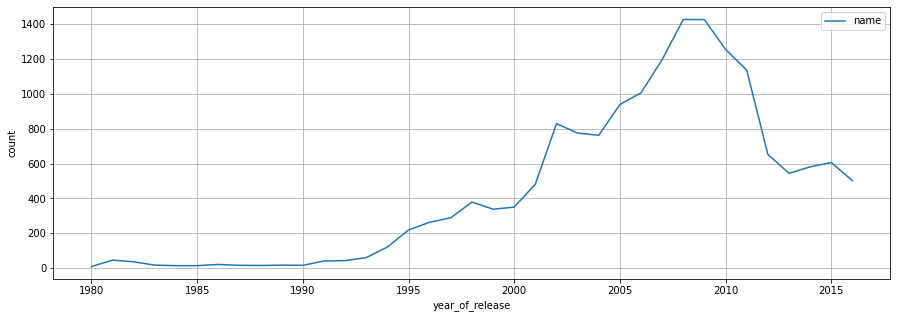

In [20]:
# построение графика распределения количества выпущенных игр по годам
pplot(df, 'year_of_release', 'name', 'count', '-')

Исходя из графика по количеству игр выпущенных в разные годы можно сказать, что данные за все периоды не важны, наиболее важным периодом для анализа можно считать период с 2005 года.

In [21]:
# создание таблицы с данными за период 2007 - 2016 гг.
adf = df.query('year_of_release >= 2005')
display(adf.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


### Изменения продаж по платформам ###

Просмотр, как менялись продажи по платформам. Выбор платформ с наибольшими суммарными продажами и построение распределения по годам.

In [22]:
# топ 10 платформ
top_10 = adf.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales').tail(10).index
print(top_10)

Index(['XOne', 'PC', '3DS', 'PSP', 'PS4', 'PS2', 'DS', 'Wii', 'PS3', 'X360'], dtype='object', name='platform')


Исходя из суммарных продаж по платформам, наибольшее число продаж приходится на платформы `XOne`, `PC`, `3DS`, `PSP`, `PS4`, `PS2`, `DS`, `Wii`, `PS3` и `X360`.

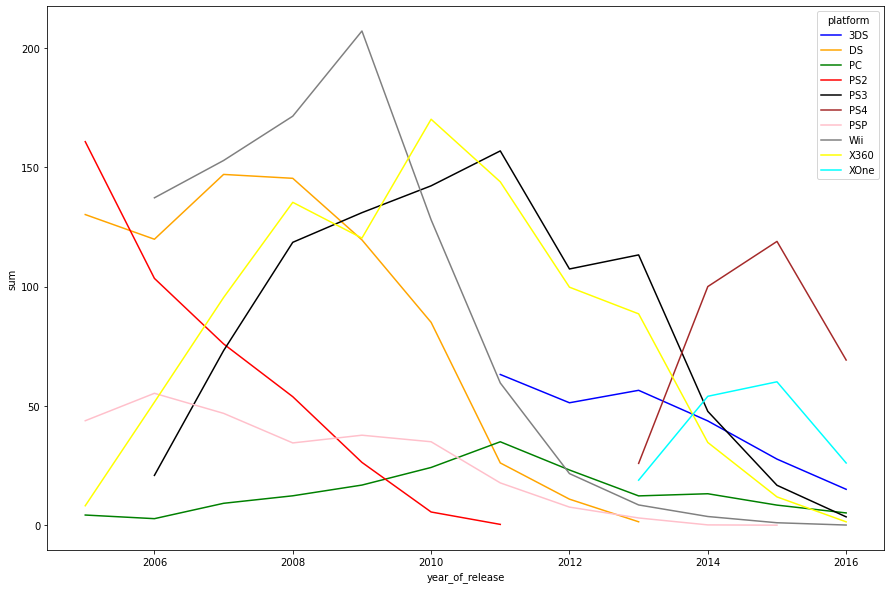

In [23]:
# цвета
palette = {'3DS': 'blue', 'DS': 'orange', 'PC': 'green', 'PS2': 'red', 'PS3': 'black', 'PS4': 'brown', 'PSP': 'pink',
          'Wii': 'grey', 'X360': 'yellow', 'XOne': 'aqua'}

# создание таблицы с данными продаж только для топ 10 платформ и построение графика распределения
adf.query('platform in @top_10').pivot_table(index = 'year_of_release', columns = 'platform', 
                                             values = 'total_sales', aggfunc = 'sum').plot(figsize = (15, 10), 
                                                                                           color = palette)
plt.ylabel('sum')
plt.show()

### Выделение актуального периода ###

 За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
# минимальные значимые продажи в миллионах
sales_min = 10

# суммарные продажи в год выше порога
report = df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('total_sales > @sales_min')

# среднее число лет выше порога продаж, деленое на 2 (так как половину жизни платформа падает)
print(report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean() / 2)

year_of_release    3.043478
dtype: float64


В среднем срок появления и исчезновения платформ, около 6 лет. Актуальный период 3.04 года, условно сочтем это за 3 года. 

In [25]:
# создание таблицы за актуальный период
aperiod = 2016 - 3
df_new = df.query('year_of_release >= @aperiod')

display(df_new)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,n/v,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,n/v,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,n/v,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,n/v,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,n/v,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,n/v,0.01


### Выделение потенциально прибыльных платформ ###

Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.

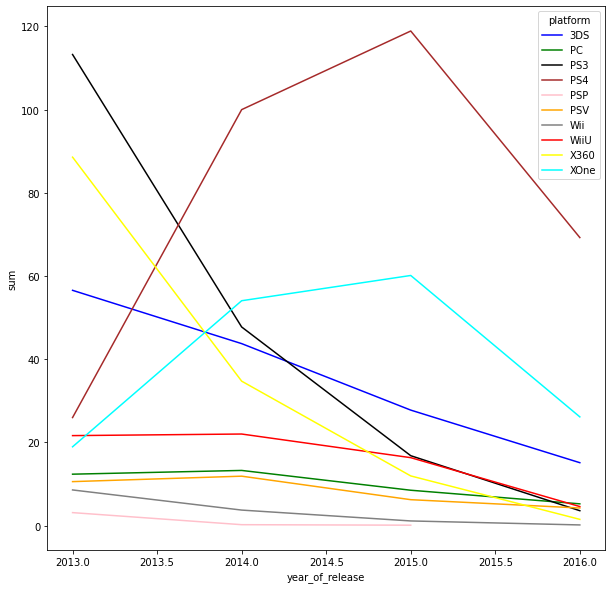

In [26]:
# топ 10 платформ за актуальный период
new_top_10 = df_new.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales').tail(10).index

# цвета
palette1 = {'3DS': 'blue', 'PSV': 'orange', 'PC': 'green', 'WiiU': 'red', 'PS3': 'black', 'PS4': 'brown', 'PSP': 'pink',
          'Wii': 'grey', 'X360': 'yellow', 'XOne': 'aqua'}

# создание таблицы с данными продаж только для топ 10 платформ актуального периода и построение графика распределения
df_new.query('platform in @new_top_10').pivot_table(index = 'year_of_release', columns = 'platform', 
                                             values = 'total_sales', aggfunc = 'sum').plot(figsize = (10, 10),
                                                                                          color = palette1)

plt.ylabel('sum')
plt.show()

Исходя из графика можно сказать, что все платформы растут и падают по продажам. Потенциально прибыльными платформами для исследуемого периода можно считать `PS4`, `XOne` и `3DS`, но в случае последней, платформа появилась примерно в 2011 году, раньше чем `PS4` и `XOne`, поэтому ее актуальность может полностью исчерпать себя к 2017 году.

### Глобальные продажи игр в разбивке по платформам ###

Построение графиков «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результатов.

In [27]:
# функция для построения диаграмм размаха
def bp(name, y1, y2):
    df_new.query('platform == @name')['total_sales'].plot(kind='box', ylim=(y1, y2), grid=True, label=name)
    plt.show()
    display(df_new.query('platform == @name')['total_sales'].describe())
    return

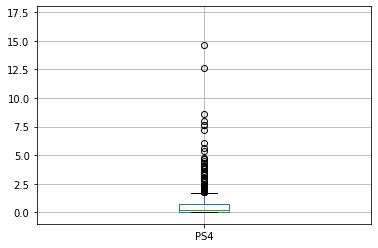

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [28]:
# диаграмма размаха для глобальных продаж PS4
bp("PS4", -1, 18)

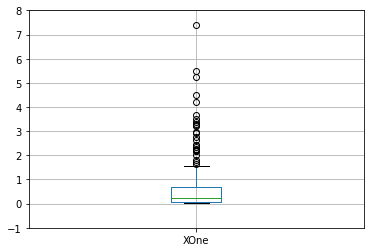

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [29]:
# диаграмма размаха для глобальных продаж XOne
bp("XOne", -1, 8)

Исходя из диаграмм размаха, в среднем игр проданных на платформе `PS4` (0.801378) больше чем на платформе `XOne` (0.645020), но и в общей сложности продаж на платформе `PS4` (392) больше, чем на платформе `XOne` (247).

### Влияние на продажи отзывов пользователей и критиков внутри одной популярной платформы ###

Посмотр, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами.

In [30]:
# создание функции для построения диаграммы рассеяния и подсчета корреляции
def scpplot(name, x, y):
    df_new.query('platform == @name').plot(x=x, y=y, kind='scatter', grid=True, figsize=(15, 5))
    plt.show()
    print(df_new[x].corr(df_new[y]))
    return

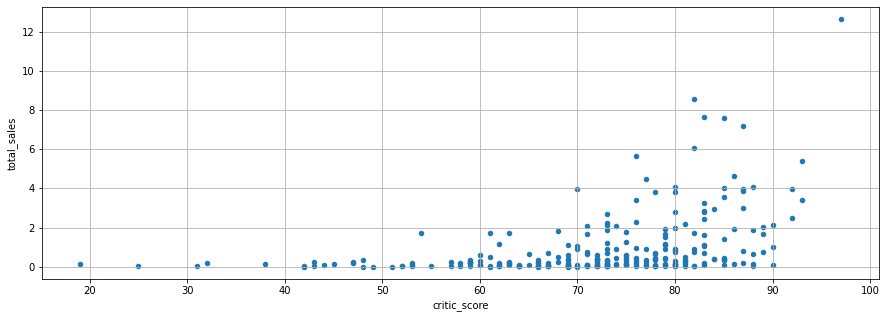

0.3136995151027371


In [31]:
# диаграмма рассеяния и корреляция между отзывами критиков и продажами для PS4
scpplot('PS4', 'critic_score', 'total_sales')

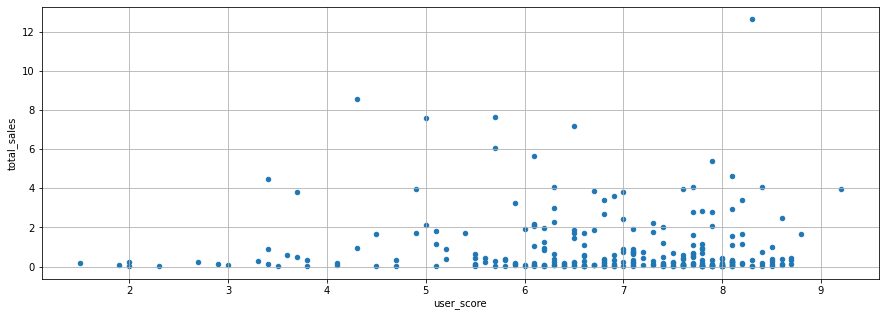

-0.0026078133545982744


In [32]:
# диаграмма рассеяния и корреляция между отзывами пользователей и продажами для PS4
scpplot('PS4', 'user_score', 'total_sales')

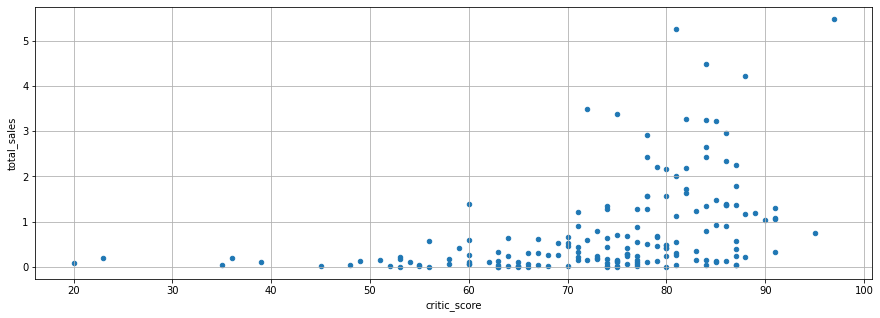

0.3136995151027371


In [33]:
# диаграмма рассеяния и корреляция между отзывами критиков и продажами для XOne
scpplot('XOne', 'critic_score', 'total_sales')

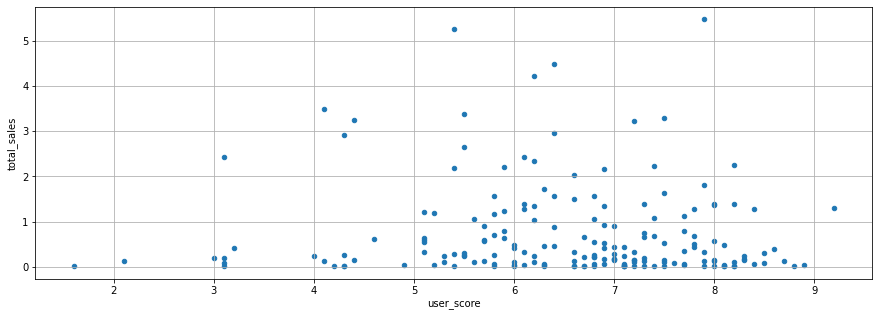

-0.0026078133545982744


In [34]:
# диаграмма рассеяния и корреляция между отзывами пользователей и продажами для XOne
scpplot('XOne', 'user_score', 'total_sales')

Линейной зависимости между продажами и отзывами пользователей - нет ни для платформы `PS4`, ни для платформы `XOne`. Линейная зависимость между продажами и отзывами критиков - присутствует, но незначительная.

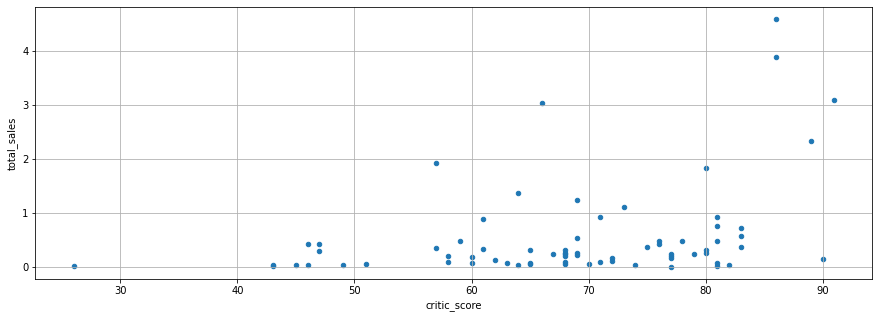

0.3136995151027371


In [35]:
# диаграмма рассеяния и корреляция между отзывами критиков и продажами для 3DS
scpplot('3DS', 'critic_score', 'total_sales')

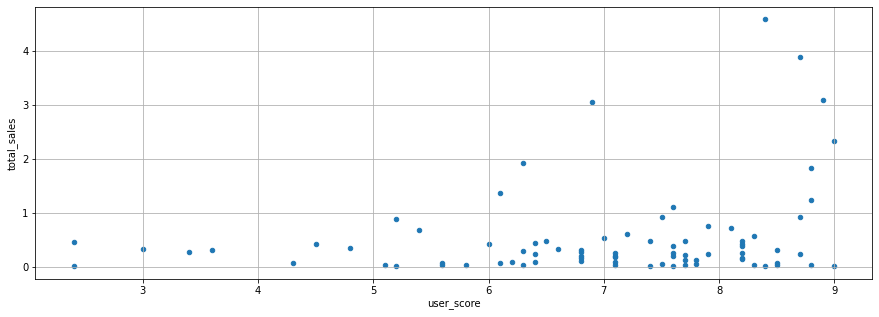

-0.0026078133545982744


In [36]:
# диаграмма рассеяния и корреляция между отзывами пользователей и продажами для 3DS
scpplot('3DS', 'user_score', 'total_sales')

Аналогично и для более старой и менее популярной платформы `3DS`, линейной зависимости продаж от отзывов пользователей - нет. Линейная зависимость между продажами и отзывами критиков - присутствует, но незначительная.

### Выделение прибыльных жанров ###

Просмотр общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
# функция для построения столбчатых диаграмм
def bar(col, col_1, func, name):
    df_new.groupby(col).agg({col_1: func}).sort_values(by=col_1, ascending=False).plot(kind="bar")
    plt.ylabel(col)
    plt.xlabel(func)
    plt.title(name)
    plt.show()
    return

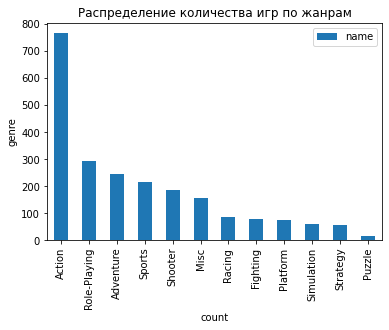

In [38]:
# построение диаграммы распределения игр по жанрам
bar('genre', 'name', 'count', 'Распределение количества игр по жанрам')

Исходя из графика распределения количества выпущенных игр по жанрам, наибольшее количество игр приходится на жанр `Action`, на втором месте - `Role-Playing` и на третьем - `Adventure`.

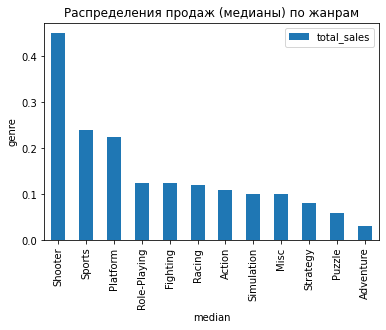

In [39]:
# построение диаграммы распределения продаж (медианы) по жанрам
bar('genre', 'total_sales', 'median', 'Распределения продаж (медианы) по жанрам')

Исходя из диаграммы распределения продаж по жанрам, наибольшее количество продаж по медиане приходится на игры жанра `Shooter`, `Sports` и `Platform`.

**Вывод**

В ходе исследовательского анализа, был выделен актуальный период, в среднем срок появления и исчезновения платформ, около 6 лет, но так как половину жизни платформа падает, то актуальный период составил - 3 года. Все платформы растут и падают по продажам. 

Потенциально прибыльными платформами для исследуемого периода можно считать `PS4`, `XOne` и `3DS`, но в случае последней, платформа появилась примерно в 2011 году, раньше чем `PS4` и `XOne`, поэтому ее актуальность может полностью исчерпать себя к 2017 году. 

При сравнении по глобальным продажам игр в разбивке по платформам в среднем игр проданных на платформе `PS4` (0.801378) больше чем на платформе `XOne` (0.645020), но и в общей сложности продаж на платформе `PS4` (392) больше, чем на платформе `XOne` (247). 

При просмотре, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, не было выявлено значимой линейной зависимости между продажами и отзывами критиков, а между продажами и отзывами пользователей зависимости нет вообще, как в случае самой популярной платформы `PS4`, так и в случае менее популярных - `XOne` и `3DS`. 

Самым популярным жанром игр является `Action`, а самым прибыльным жанром игр является `Shooter`.

## Шаг 4. Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) ###

Определение для пользователя каждого региона (NA, EU, JP, other):
Самые популярные платформы (топ-5). Описание различия в долях продаж.

In [40]:
# функция жля построения графиков и таблиц
def top5(row):
    sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    
    # число рядов и столбцов в сетке графиков
    col_count, row_count = 2, 2
    
    # размер графиков
    plt.figure(figsize = (15, 7))
    
    for i, sale in enumerate(sales):
        ptable = (df_new
                  .pivot_table(index=row, values=sale, aggfunc='sum')
                  .sort_values(by=sale, ascending=False)
                  .reset_index()
                  .head(5))
        display(ptable)
        print('\n')
        
        sns.barplot(data=ptable, x=row, y=sale, ax = plt.subplot(row_count, col_count, i + 1))
        
        # добавление подзаголовков на каждый график
        plt.title(sale)
        
        # настройка подзаголовков
        plt.tight_layout()
    return

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


,platform,other_sales
0,PS4,48.35
1,PS3,26.77
2,XOne,14.27
3,X360,12.11
4,3DS,6.28


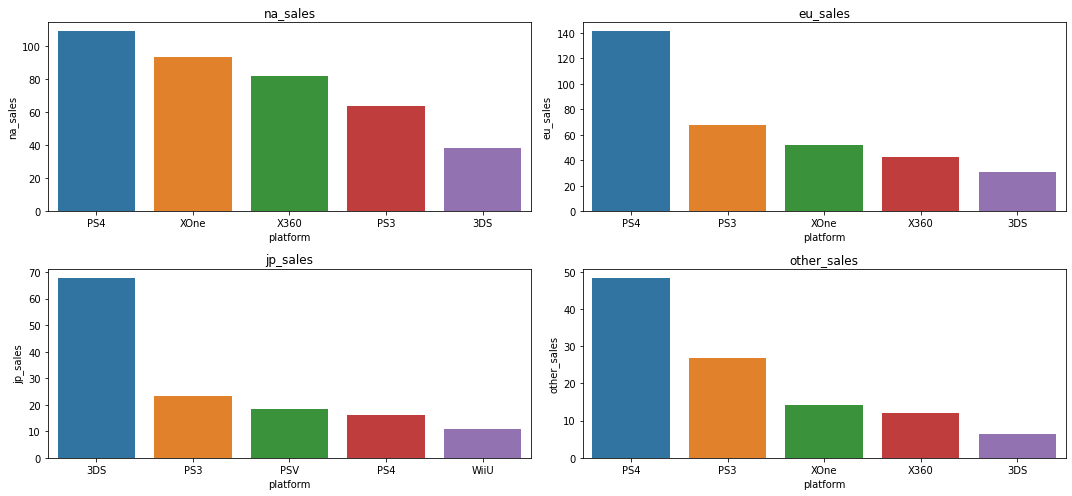

In [41]:
top5('platform')

В основном самой популярной платформой является `PS4`, для большинства регионов, коме Японии, в Японии первое место по популярности занимает более старая платформа `3DS`, в то время как для других стран, она является последней из пятерки самых популярных платформ.

### Самые популярные жанры (топ-5) ###

Определение для пользователя каждого региона (NA, EU, JP, other): Самые популярные жанры (топ-5).

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


,genre,other_sales
0,Action,37.20
1,Shooter,28.77
2,Sports,19.45
3,Role-Playing,11.48
4,Misc,6.09


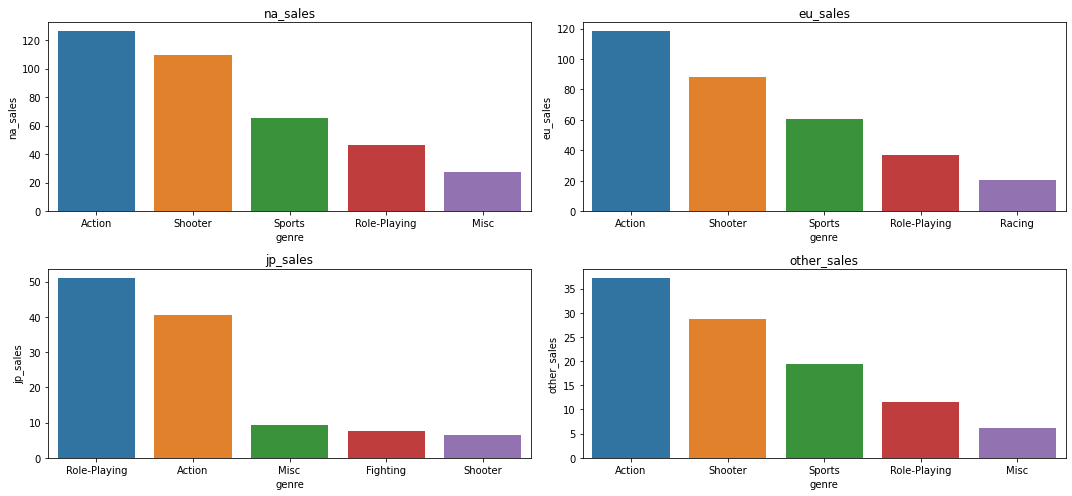

In [42]:
top5('genre')

Самым популярным жанорм является `Action`, для большинства регионов, но снова отличилась Япония, там первое место по популярности занимает жанр `Role-Playing`, a `Action` занимает второе место. На втором месте по популярности, в большинстве регионов, жанр `Shooter`, тогда как в Японии он занимает последнее место среди Топ-5 популярных жанров.

### Влияние рейтинга ESRB на продажи в отдельном регионе ###

Определение для пользователя каждого региона (NA, EU, JP, other): Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,rating,na_sales
0,M,165.21
1,n/v,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


,rating,eu_sales
0,M,145.32
1,E,83.36
2,n/v,78.91
3,E10+,42.69
4,T,41.95


,rating,jp_sales
0,n/v,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


,rating,other_sales
0,M,47.04
1,n/v,23.46
2,E,22.61
3,T,14.29
4,E10+,12.57


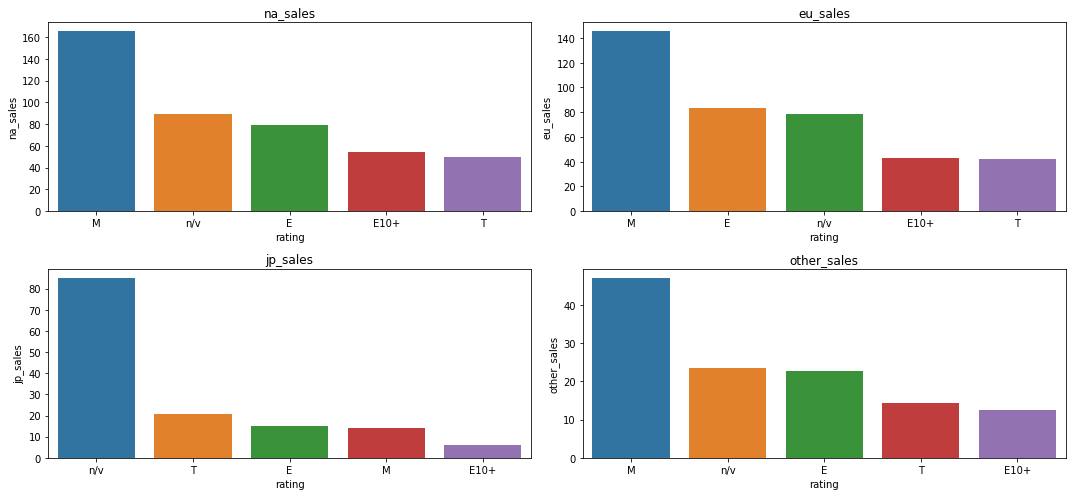

In [43]:
top5('rating')

ESRB рейтинг оказывает небольшое влияние на продажи в Северной Америке, Европе и других странах, но в Японии - нет.

**Вывод**

При составлении портрета пользователя для каждого региона, можно сказать, что пользователи Японии отличаются от любых других пользователей, как по выбору игровой платформы, жанру так и по зависимости продажи игр от рейтинга УЫКИю
Портрет пользователей для разных регионов:

* `NA` - Наиболее популярной платформой является `PS4`, на втором месте `XOne`, платформа `3DS` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Action` и `Shooter` (1 и 2 место, соответственно), `Music` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` оказывает небольшое влияние на продажи, наибольшие суммы продаж приходятся на позиции с рейтингом, но на втором месте по суммам продаж оказываются игры без рейтинга `ESRB`.
* `EU` - Наиболее популярной платформой является `PS4`, на втором месте `PS3`, платформа `3DS` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Action` и `Shooter` (1 и 2 место, соответственно), `Racing` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` оказывает влияние на продажи больше чем в Северной Америке, наибольшие суммы продаж приходятся на позиции с рейтингом (1 и 2 места), но на третьем месте по суммам продаж оказываются игры без рейтинга `ESRB`.
* `JP` - Наиболее популярной платформой является `3DS`, на втором месте `PS3`, платформа `WiiU` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Role-Playing` и `Action` (1 и 2 место, соответственно), `Shooter` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` совершенно не оказывает влияния на суммы продажи в данном регионе, большинство сумм продаж приходится на игры без рейтинга `ESRB`.
* `Other` - Наиболее популярной платформой является `PS4`, на втором месте `PS3`, платформа `3DS` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Action` и `Shooter` (1 и 2 место, соответственно), `Music` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` оказывает небольшое влияние на продажи, наибольшие суммы продаж приходятся на позиции с рейтингом, но на втором месте по суммам продаж оказываются игры без рейтинга `ESRB`.

## Шаг 5. Проверка гипотез

### Гипотеза № 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые ###

H₀: средние пользовательские рейтинги платформ Xbox One и PC равны;

H₁: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Исходя из формулировки гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, были сформулированы нулевая(H₀) и альтернативная гипотезы(H₁), для нулевой сделано предположение о том, что средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформ PC, а для альтернативной, наоборот, средние пользовательские рейтинги платформ Xbox One не равны средним пользовательским рейтингам платформ PC.

Генеральные совокупности не зависят друг от друга. Выборочные средние нормально распределены. Для проверки гипотезы подойдет t-тест.

In [44]:
# удаление пропусков в user_score
df_new = df_new.dropna(subset=['user_score'])

In [45]:
# подсчет средних значений по выборкам разных платформ
mean_x1 = df_new.query('platform == "XOne"')['user_score'].agg('mean')
mean_p1 = df_new.query('platform == "PC"')['user_score'].agg('mean')
print(f'среднее для выборки по платформе XOne равно {mean_x1}') 
print(f'среднее для выборки по платформе PC равно {mean_p1}')

среднее для выборки по платформе XOne равно 6.521428571428572
среднее для выборки по платформе PC равно 6.2696774193548395


In [46]:
# критический уровень статистической значимости
# если p-value окажется меньше него - гипотеза отвергается
alpha = .001

results = st.ttest_ind(df_new.query('platform == "XOne"')['user_score'], 
                      df_new.query('platform == "PC"')['user_score']
                      )

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


По результату t-теста средние пользовательские рейтинги платформы `Xbox One` (`XOne`) равны средним пользовательским рейтингам платформы `PC`. То есть можно сказать, что гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отвергается.

### Гипотеза № 2: Средние пользовательские рейтинги жанров Action и Sports разные ###

H₀: средние пользовательские рейтинги жанров Action и Sports равны;

H₁: средние пользовательские рейтинги жанров Action и Sports не равны.

Исходя из формулировки гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные, были сформулированы нулевая(H₀) и альтернативная гипотезы(H₁), для нулевой сделано предположение о том, что средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports, а для альтернативной, наоборот, средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports.

Генеральные совокупности не зависят друг от друга. Выборочные средние нормально распределены. Для проверки гипотезы подойдет t-тест.

In [47]:
# критический уровень статистической значимости
# если p-value окажется меньше него - гипотеза отвергается
alpha = .001

results = st.ttest_ind(df_new.query('genre == "Action"')['user_score'], 
                      df_new.query('genre == "Sports"')['user_score']
                      )

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


По результату t-теста средние пользовательские рейтинги жанра `Action` не равны средним пользовательским рейтингам жанра `Sports`. То есть можно сказать, что гипотеза о том, что cредние пользовательские рейтинги жанров `Action` и `Sports` разные - не отвергается.

## Шаг 6. Общий вывод

*Предобработка данных*

В начале проекта, при просмотре данных, названия всех столбцов были приведены к общему (нижнему) регистру. 

В столбцах `name`, `year_of_release` и `genre` пропуски были удалены, так как их доля составляет менее 5%. Для столбцов `critic_score` и `user_score` пропущенные значения были оставлены, так как для них нет корректной замены, любая замена пропущеных значений в этих столбцах понесет за собой искажение результатов при дальнейших расчетах. 

При просмотре уникальных значений в столбце `user_score` было обнаружено значение `tbd` и было изменено на `nan`. 

Для столбца `rating` пропущеные значения были заменены на `n/v`, так как переменная является категориальной. 

Были изменены типы данных для столбцов `year_of_release` и `user_score`. 

Далее был произведен расчет суммарных продаж во всех регионах и добавлен в отдельный столбец.

*Исследовательский анализ данных*

В ходе исследовательского анализа, был выделен актуальный период, в среднем срок появления и исчезновения платформ, около 6 лет, но так как половину жизни платформа падает, то актуальный период составил - 3 года. Все платформы растут и падают по продажам. 

Потенциально прибыльными платформами для исследуемого периода можно считать `PS4`, `XOne` и `3DS`, но в случае последней, платформа появилась примерно в 2011 году, раньше чем `PS4` и `XOne`, поэтому ее актуальность может полностью исчерпать себя к 2017 году. 

При сравнении по глобальным продажам игр в разбивке по платформам в среднем игр проданных на платформе `PS4` (0.801378) больше чем на платформе `XOne` (0.645020), но и в общей сложности продаж на платформе `PS4` (392) больше, чем на платформе `XOne` (247). 

При просмотре, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, не было выявлено значимой линейной зависимости между продажами и отзывами критиков, а между продажами и отзывами пользователей зависимости нет вообще, как в случае самой популярной платформы `PS4`, так и в случае менее популярных - `XOne` и `3DS`. 

Самым популярным жанром игр является `Action`, а самым прибыльным жанром игр является `Shooter`.

*Портрет пользователья каждого региона*

При составлении портрета пользователя для каждого региона, можно сказать, что пользователи Японии отличаются от любых других пользователей, как по выбору игровой платформы, жанру так и по зависимости продажи игр от рейтинга `ESRB`
Портрет пользователей для разных регионов:

* `NA` - Наиболее популярной платформой является `PS4`, на втором месте `XOne`, платформа `3DS` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Action` и `Shooter` (1 и 2 место, соответственно), `Music` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` оказывает небольшое влияние на продажи, наибольшие суммы продаж приходятся на позиции с рейтингом, но на втором месте по суммам продаж оказываются игры без рейтинга `ESRB`.
* `EU` - Наиболее популярной платформой является `PS4`, на втором месте `PS3`, платформа `3DS` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Action` и `Shooter` (1 и 2 место, соответственно), `Racing` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` оказывает влияние на продажи больше чем в Северной Америке, наибольшие суммы продаж приходятся на позиции с рейтингом (1 и 2 места), но на третьем месте по суммам продаж оказываются игры без рейтинга `ESRB`.
* `JP` - Наиболее популярной платформой является `3DS`, на втором месте `PS3`, платформа `WiiU` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Role-Playing` и `Action` (1 и 2 место, соответственно), `Shooter` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` совершенно не оказывает влияния на суммы продажи в данном регионе, большинство сумм продаж приходится на игры без рейтинга `ESRB`.
* `Other` - Наиболее популярной платформой является `PS4`, на втором месте `PS3`, платформа `3DS` самая не популярная из Топ-5. Наиболее популярными жанрами являются `Action` и `Shooter` (1 и 2 место, соответственно), `Music` - самый непопулярный жанр для этого региона из Топ-5. Рейтинг `ESRB` оказывает небольшое влияние на продажи, наибольшие суммы продаж приходятся на позиции с рейтингом, но на втором месте по суммам продаж оказываются игры без рейтинга `ESRB`.

*Проверка гипотез*

При проверке гипотез, гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отвергается. Гипотеза о том, что cредние пользовательские рейтинги жанров `Action` и `Sports` разные - не отвергается.

***Рекомендации***

При планировании рекламной компании, стоит учесть, что для большинства регионов платформа `PS4` и жанр игр `Action` и `Shooter` будут наиболее прибыльными, за исключением Японии, для пользователей Японии наиболее популярной платформой является `3DS` и наиблее популярный жанр игр это `Role-Playing` и `Action`.